In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

In [10]:
firstRow = session.query(measurement).first()
firstRow.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2a47a50ed90>,
 'date': '2010-01-01',
 'tobs': 65.0,
 'id': 1,
 'station': 'USC00519397',
 'prcp': 0.08}

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
queryDate = session.query(func.max(measurement.date)).one()[0]
print("The current year's date is:", queryDate)

The current year's date is: 2017-08-23


In [12]:
#Clean the date string
#trimComma = recentDate.replace(',','')
#trimOpen = trimComma.replace('(','')
#trimClose = trimOpen.replace(')','')
#trimtics = trimClose.replace("'","")
#currentYear = trimtics


In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
previousYear = dt.datetime.strptime(queryDate, "%Y-%m-%d")- dt.timedelta(days=365)
previousYear = previousYear.date()
print("The previous year's date is:", previousYear)
# Perform a query to retrieve the data and precipitation scores
queryYearlyScores = session.query(measurement.date, measurement.prcp).filter(measurement.date <= queryDate, measurement.date >= previousYear).all()
queryYearlyScores
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
yearlyScores_df = pd.DataFrame(queryYearlyScores, columns = ["Date", "Precipitation"])
yearlyScores_df = yearlyScores_df.set_index('Date').sort_index(ascending= True)
yearlyScores_df = yearlyScores_df.dropna()
yearlyScores_df.head()

The previous year's date is: 2016-08-23


,Precipitation
Date,
2016-08-23,0.00
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,0.70


(array([-500.,    0.,  500., 1000., 1500., 2000., 2500.]),
 [Text(-500.0, 0, '2017-05-18'),
  Text(0.0, 0, '2016-08-23'),
  Text(500.0, 0, '2016-11-16'),
  Text(1000.0, 0, '2017-02-13'),
  Text(1500.0, 0, '2017-05-14'),
  Text(2000.0, 0, '2017-08-17'),
  Text(2500.0, 0, '')])

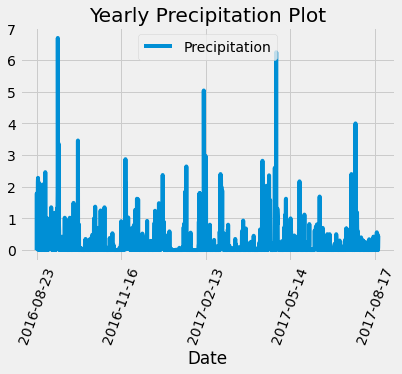

In [14]:
yearlyScores_df.plot(title = "Yearly Precipitation Plot")
plt.legend(loc="upper center")
plt.xticks(rotation = 70)

In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
yearlyScores_summary = yearlyScores_df.describe()
print("Summary Statistics for the Precipitation Data:")
yearlyScores_summary

Summary Statistics for the Precipitation Data:


,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [16]:
# Design a query to calculate the total number stations in the dataset
queryStations = session.query(func.count(station.station)).one()[0]
print("Number of Stations are:", queryStations)

#counts_df = pd.DataFrame(queryStations, columns = ["Number of Stations"])
#counts_df.head()


Number of Stations are: 9


In [17]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
activeStations = session.query(measurement.station,func.count(measurement.station)).group_by(measurement.station).order_by(desc(func.count(measurement.station))).all()
#activeStations_df = pd.DataFrame(activeStations, columns = ["Most Active Stations", "Count"])
#activeStations_df
activeStations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [18]:
# get the most active station id
mostActiveStation = activeStations[0][0]
mostActiveStation



'USC00519281'

In [19]:

# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
maxTemp = session.query(func.max(measurement.tobs)).filter(measurement.station == mostActiveStation).all()
print("Highest Temperature is", maxTemp )
minTemp = session.query(func.max(measurement.tobs)).filter(measurement.station == mostActiveStation).all()
print("Lowest Temperature is", minTemp)
avgTemp = session.query(func.max(measurement.tobs)).filter(measurement.station == mostActiveStation).all()
print("Average Temperature is", avgTemp)

Highest Temperature is [(85.0,)]
Lowest Temperature is [(85.0,)]
Average Temperature is [(85.0,)]


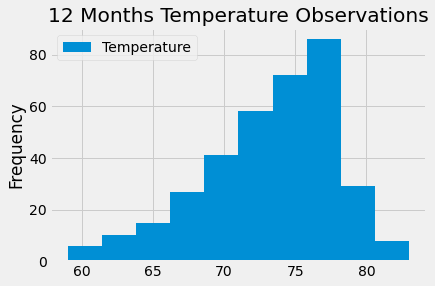

In [20]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tempData = session.query(measurement.date, measurement.tobs).filter(measurement.station == mostActiveStation, measurement.date >= previousYear).all()
tempData_df = pd.DataFrame(tempData, columns = ["Date", "Temperature"])
tempData_df.plot.hist()
plt.title("12 Months Temperature Observations")
plt.show()


# Close session

In [21]:
# Close Session
session.close()